# Практическое занятие: Расчёт и анализ АЧХ LC полосового фильтра

**Цели занятия:**
1. Изучить принцип работы последовательного RLC полосового фильтра
2. Освоить расчёт амплитудно-частотной характеристики (АЧХ)
3. Научиться проектировать фильтр по заданным параметрам
4. Получить навыки работы с библиотеками NumPy, Pandas, Matplotlib

---
## Часть 1. Теория LC полосового фильтра

### 1.1. Что такое полосовой фильтр

**Полосовой фильтр (ПФ)** — электрическая цепь, которая пропускает
сигналы в определённой полосе частот и подавляет сигналы за её пределами.

Характерные параметры:
- **Центральная (резонансная) частота** $f_0$ — частота максимального пропускания
- **Полоса пропускания** $\Delta f$ — ширина полосы по уровню $-3$ дБ
  (т.е. там, где амплитуда падает до $1/\sqrt{2} \approx 0{,}707$ от максимума)
- **Добротность** $Q = f_0 / \Delta f$ — характеризует «остроту» настройки

### 1.2. Схема последовательного RLC полосового фильтра

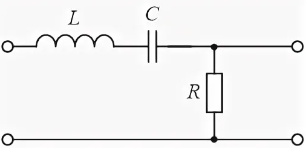

Индуктивность L, ёмкость C и сопротивление нагрузки R
соединены **последовательно**. Входное напряжение подаётся на всю цепь,
выходное — снимается с резистора R.

**Физический смысл:**
- На **низких частотах** импеданс конденсатора
  $X_C = 1/(\omega C)$ очень велик → почти всё напряжение
  падает на C → $V_{\text{вых}} \approx 0$
- На **высоких частотах** импеданс катушки
  $X_L = \omega L$ очень велик → почти всё напряжение
  падает на L → $V_{\text{вых}} \approx 0$
- На **резонансной частоте** $X_L = X_C$ → реактивные сопротивления
  L и C **компенсируют** друг друга → всё напряжение на R →
  $V_{\text{вых}} = V_{\text{вх}}$

### 1.3. Передаточная функция

Полное сопротивление цепи:

$$Z = R + j\omega L + \frac{1}{j\omega C} = R + j\!\left(\omega L - \frac{1}{\omega C}\right)$$

Комплексная передаточная функция (отношение выходного напряжения к входному):

$$\boxed{H(j\omega) = \frac{R}{R + j\!\left(\omega L - \frac{1}{\omega C}\right)}}$$

Введём **нормированную частоту** $x = f/f_0 = \omega/\omega_0$
и **добротность** $Q$. Тогда:

$$\boxed{H(jx) = \frac{j\, x/Q}{1 - x^2 + j\, x/Q}}$$

---

**Амплитудно-частотная характеристика (АЧХ):**

$$|H(f)| = \frac{1}{\sqrt{1 + Q^2\!\left(\dfrac{f}{f_0} - \dfrac{f_0}{f}\right)^{\!2}}}$$

**АЧХ в децибелах:**

$$|H(f)|_{\text{дБ}} = -10\,\lg\!\left[1 + Q^2\!\left(\frac{f}{f_0} - \frac{f_0}{f}\right)^{\!2}\right]$$

**Фазо-частотная характеристика (ФЧХ):**

$$\varphi(f) = -\arctan\!\left[Q\!\left(\frac{f}{f_0} - \frac{f_0}{f}\right)\right]$$

При $f < f_0$: $\varphi > 0$ (опережение).
При $f = f_0$: $\varphi = 0$.
При $f > f_0$: $\varphi < 0$ (запаздывание).

### 1.4. Основные расчётные формулы

#### Прямая задача (анализ): даны L, C, R → найти параметры фильтра

| Параметр | Формула |
|:---------|:--------|
| Резонансная частота | $f_0 = \dfrac{1}{2\pi\sqrt{LC}}$ |
| Угловая частота | $\omega_0 = 2\pi f_0 = \dfrac{1}{\sqrt{LC}}$ |
| Добротность | $Q = \dfrac{1}{R}\sqrt{\dfrac{L}{C}} = \dfrac{\omega_0 L}{R} = \dfrac{1}{\omega_0 C R}$ |
| Полоса пропускания | $\Delta f = \dfrac{f_0}{Q} = \dfrac{R}{2\pi L}$ |
| Нижняя граница $(-3$ дБ$)$ | $f_1 = f_0\!\left(-\dfrac{1}{2Q} + \sqrt{\dfrac{1}{4Q^2}+1}\right)$ |
| Верхняя граница $(-3$ дБ$)$ | $f_2 = f_0\!\left(+\dfrac{1}{2Q} + \sqrt{\dfrac{1}{4Q^2}+1}\right)$ |

**Свойства граничных частот:**
- $f_2 - f_1 = \Delta f$ (арифметическая разность = полоса)
- $\sqrt{f_1 \cdot f_2} = f_0$ (геометрическое среднее = центральная частота)
- При $Q \gg 1$: $f_1 \approx f_0 - \Delta f/2$, $\;f_2 \approx f_0 + \Delta f/2$

### 1.5. Обратная задача (проектирование): заданы $f_0$, $\Delta f$, $R$ → найти L, C

$$\boxed{Q = \frac{f_0}{\Delta f}}$$

$$\boxed{L = \frac{R}{2\pi\,\Delta f} = \frac{Q\,R}{2\pi\,f_0}}$$

$$\boxed{C = \frac{1}{4\pi^2 f_0^2\,L} = \frac{\Delta f}{2\pi\,f_0^2\,R}}$$

**Пример.** $f_0 = 5000$ Гц, $\Delta f = 500$ Гц, $R = 50$ Ом.

$Q = 5000/500 = 10$

$L = 50\,/\,(2\pi \cdot 500) = 15{,}92$ мГн

$C = 1\,/\,(4\pi^2 \cdot 5000^2 \cdot 0{,}01592) = 63{,}66$ нФ

---
## Часть 2. Библиотеки Python

### 2.1. NumPy — массивы и математика

**NumPy** — основная библиотека для числовых вычислений в Python.
Она позволяет работать с массивами чисел и применять
математические операции сразу ко всем элементам.

In [ ]:
import numpy as np

# Создание массивов
a = np.array([1, 2, 3, 4, 5])
print("Массив a:", a)

# Равномерная сетка: 5 точек от 0 до 10
b = np.linspace(0, 10, 5)
print("linspace:", b)

# Логарифмическая сетка: 5 точек от 10^1 до 10^4
c = np.logspace(1, 4, 5)
print("logspace:", c)

# Математические операции — поэлементные!
print("a^2    =", a**2)
print("sqrt(a)=", np.sqrt(a))
print("pi     =", np.pi)

### 2.2. Pandas — табличные данные

**Pandas** — библиотека для работы со структурированными данными.
Основной объект — `DataFrame` (таблица со столбцами).

Ключевые операции:
- создание таблицы из словаря
- доступ к столбцам по имени
- фильтрация строк по условию
- вычисление статистик
- экспорт в CSV

In [ ]:
import pandas as pd

# Создание DataFrame из словаря
df_demo = pd.DataFrame({
    'Частота': [100, 200, 500, 1000, 2000],
    'Амплитуда': [0.1, 0.3, 0.9, 1.0, 0.5],
    'Фаза_град': [80, 60, 20, 0, -40]
})

print("=== Таблица ===")
print(df_demo)
print()

# Доступ к столбцу
print("Столбец 'Амплитуда':")
print(df_demo['Амплитуда'])
print()

# Фильтрация: строки, где амплитуда > 0.5
print("Строки с амплитудой > 0.5:")
print(df_demo[df_demo['Амплитуда'] > 0.5])
print()

# Статистика
print("Статистика:")
print(df_demo.describe())

In [ ]:
# Добавление нового столбца
df_demo['Амплитуда_дБ'] = 20 * np.log10(df_demo['Амплитуда'])
print(df_demo)

# Сохранение в CSV
# df_demo.to_csv('demo_data.csv', index=False)

### 2.3. Matplotlib — построение графиков

**Matplotlib** — основная библиотека визуализации.
Модуль `pyplot` предоставляет интерфейс, похожий на MATLAB.

Основные функции:
- `plt.plot(x, y)` — линейный график
- `plt.xlabel()`, `plt.ylabel()`, `plt.title()` — подписи
- `plt.legend()` — легенда
- `plt.grid()` — сетка
- `plt.subplots()` — несколько графиков на одной фигуре
- `plt.savefig()` — сохранение в файл

In [ ]:
import matplotlib.pyplot as plt

# Простой график
x = np.linspace(0, 2 * np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(10, 4))
plt.plot(x, y1, 'b-', linewidth=2, label='sin(x)')
plt.plot(x, y2, 'r--', linewidth=2, label='cos(x)')
plt.xlabel('x, рад')
plt.ylabel('y')
plt.title('Пример графика')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Несколько подграфиков (subplots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(x, y1, 'b-')
ax1.set_ylabel('sin(x)')
ax1.set_title('Два подграфика')
ax1.grid(True, alpha=0.3)

ax2.plot(x, y2, 'r-')
ax2.set_xlabel('x, рад')
ax2.set_ylabel('cos(x)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Часть 3. Программа расчёта полосового фильтра

### Задача 1. Построение АЧХ заданного фильтра

**Дано:** $L = 10$ мГн, $C = 1$ мкФ, $R = 10$ Ом

**Требуется:**
1. Рассчитать $f_0$, $Q$, $\Delta f$
2. Построить АЧХ и ФЧХ
3. Определить граничные частоты полосы пропускания

In [ ]:
# ============================================================
#  ШАГ 1. Импорт библиотек
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Глобальные настройки графиков
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 12

In [ ]:
# ============================================================
#  ШАГ 2. Параметры компонентов фильтра
# ============================================================
L = 10e-3     # Индуктивность, Гн  (10 мГн)
C = 1e-6      # Ёмкость, Ф         (1 мкФ)
R = 10        # Сопротивление, Ом

In [ ]:
# ============================================================
#  ШАГ 3. Расчёт теоретических параметров фильтра
# ============================================================

# Резонансная (центральная) частота
f0 =
w0 =

# Добротность
Q =

# Полоса пропускания
delta_f =                       # через Q
delta_f_check =                 # через R и L (проверка)

# Точные граничные частоты по уровню -3 дБ
f1 =
f2 =

print("╔══════════════════════════════════════════╗")
print("║   РАСЧЁТНЫЕ ПАРАМЕТРЫ ФИЛЬТРА            ║")
print("╠══════════════════════════════════════════╣")
print(f"║  Резонансная частота  f₀ = {f0:10.2f} Гц   ║")
print(f"║  Добротность          Q = {Q:10.2f}        ║")
print(f"║  Полоса пропускания  Δf = {delta_f:10.2f} Гц   ║")
print(f"║  Нижняя граница      f₁ = {f1:10.2f} Гц   ║")
print(f"║  Верхняя граница     f₂ = {f2:10.2f} Гц   ║")
print("╠══════════════════════════════════════════╣")
print("║  ПРОВЕРКА:                                ║")
print(f"║  f₂ − f₁ = {f2-f1:.2f} Гц  (≈ Δf = {delta_f:.2f})  ║")
print(f"║  √(f₁·f₂) = {np.sqrt(f1*f2):.2f} Гц (≈ f₀ = {f0:.2f})║")
print("╚══════════════════════════════════════════╝")

In [ ]:
# ============================================================
#  ШАГ 4. Расчёт АЧХ и ФЧХ
# ============================================================

# Массив частот: от f0/5 до f0*5 (2000 точек)
f =

# Нормированная частота
x = f / f0

# Комплексная передаточная функция
#   H(jx) = (j·x/Q) / (1 - x² + j·x/Q)
H_complex = (1j * x / Q) / (1 - x**2 + 1j * x / Q)

# Модуль (АЧХ)
H_mag =

# Модуль в децибелах
H_dB =

# Фаза в градусах (ФЧХ)
H_phase =

print(f"Частотный диапазон: {f[0]:.0f} ... {f[-1]:.0f} Гц")
print(f"Количество точек:  {len(f)}")
print(f"Максимум АЧХ:      {np.max(H_mag):.4f} на частоте {f[np.argmax(H_mag)]:.1f} Гц")

In [ ]:
# ============================================================
#  ШАГ 5. Сохранение данных в DataFrame (Pandas)
#   частота в Гц
#   нормированная частота f/f0
#   |H(f)|
#   |H(f)| в дБ
#   фаза в градусах
# ============================================================

df_result =

In [ ]:
# ============================================================
#  ШАГ 6. Определение полосы пропускания из данных
# ============================================================

# Фильтрация: оставляем строки, где H_dB >= -3 дБ
passband = df_result[df_result['H_dB'] >= -3.0]

f1_data = passband['f_Hz'].min()
f2_data = passband['f_Hz'].max()
bw_data = f2_data - f1_data

print("Полоса пропускания (из рассчитанных данных):")
print(f"  f₁ ≈ {f1_data:.1f} Гц")
print(f"  f₂ ≈ {f2_data:.1f} Гц")
print(f"  Δf ≈ {bw_data:.1f} Гц")
print(f"  Точек в полосе: {len(passband)}")
print()
print("Сравнение с теорией:")
print(f"  f₁ теор. = {f1:.1f} Гц  |  f₁ расч. = {f1_data:.1f} Гц")
print(f"  f₂ теор. = {f2:.1f} Гц  |  f₂ расч. = {f2_data:.1f} Гц")
print(f"  Δf теор. = {delta_f:.1f} Гц  |  Δf расч. = {bw_data:.1f} Гц")

In [ ]:
# ============================================================
#  ШАГ 7. Построение графиков
# ============================================================


# -------- АЧХ (линейный масштаб) --------

# -------- АЧХ (в децибелах) --------

# -------- ФЧХ --------


---
### Задача 2. Проектирование фильтра по заданным параметрам

**Дано:**
- Центральная частота: $f_0 = 5000$ Гц
- Полоса пропускания: $\Delta f = 500$ Гц
- Сопротивление нагрузки: $R = 50$ Ом

**Требуется:** рассчитать L и C, построить АЧХ, убедиться в правильности.